# Bridging Biology and Models: From Neural Mechanisms to Motion Energy

## Overview

In this notebook, we'll explore the crucial connection between biological visual systems and computational models of motion perception. Building on our understanding of the visual pathway from retina to MT, we'll now establish a clear bridge to the motion energy model framework that we'll implement in the next module.

Topics we'll cover:
- Connecting biological neurons to computational model components
- Mapping spatiotemporal filters to V1/MT neural responses
- Understanding how motion energy relates to neural computations
- Exploring how biological constraints inform model design
- Establishing the foundations for the upcoming motion energy model implementation

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import matplotlib.cm as cm
from IPython.display import HTML

# Set some plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Connecting Neural Mechanisms to Computational Models

Throughout this module, we've explored how the visual system processes motion information, from retinal ganglion cells to MT neurons. Now, we'll connect these biological mechanisms to the computational framework of motion energy models.

The connection between neural mechanisms and computational models serves several important purposes:

1. **Validation**: Models based on neural principles can be validated against physiological data
2. **Prediction**: Computational models can generate predictions for new neural experiments
3. **Understanding**: Models provide a formal framework for understanding complex neural processes
4. **Application**: Biologically-inspired models can be applied to computer vision tasks

Let's start by examining how key components of the visual system map to elements in motion energy models:

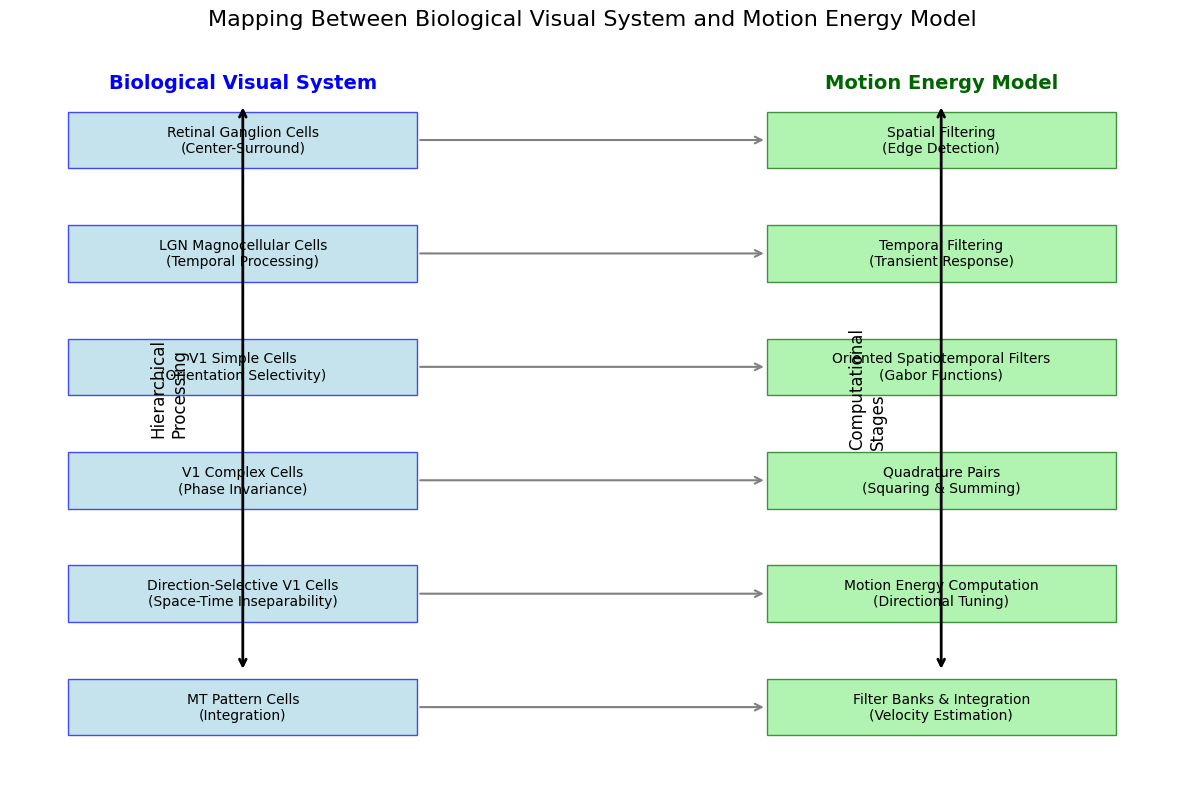

In [5]:
def create_bio_model_mapping_visual():
    """Create a visual representation of the biological-to-model mapping"""
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set up the plotting area
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Define biological components (left side)
    bio_components = [
        "Retinal Ganglion Cells\n(Center-Surround)",
        "LGN Magnocellular Cells\n(Temporal Processing)",
        "V1 Simple Cells\n(Orientation Selectivity)",
        "V1 Complex Cells\n(Phase Invariance)",
        "Direction-Selective V1 Cells\n(Space-Time Inseparability)",
        "MT Pattern Cells\n(Integration)"
    ]
    
    # Define computational model components (right side)
    model_components = [
        "Spatial Filtering\n(Edge Detection)",
        "Temporal Filtering\n(Transient Response)",
        "Oriented Spatiotemporal Filters\n(Gabor Functions)",
        "Quadrature Pairs\n(Squaring & Summing)",
        "Motion Energy Computation\n(Directional Tuning)",
        "Filter Banks & Integration\n(Velocity Estimation)"
    ]
    
    # Positions for bio components (left side)
    bio_y_positions = np.linspace(9, 1, len(bio_components))
    bio_x_position = 2
    
    # Positions for model components (right side)
    model_y_positions = np.linspace(9, 1, len(model_components))
    model_x_position = 8
    
    # Draw biological components
    bio_boxes = []
    for i, (component, y) in enumerate(zip(bio_components, bio_y_positions)):
        # Draw box
        box = plt.Rectangle((bio_x_position - 1.5, y - 0.4), 3, 0.8, 
                           fc='lightblue', ec='blue', alpha=0.7)
        ax.add_patch(box)
        bio_boxes.append(box)
        
        # Add text
        ax.text(bio_x_position, y, component, ha='center', va='center', fontsize=10)
    
    # Draw model components
    model_boxes = []
    for i, (component, y) in enumerate(zip(model_components, model_y_positions)):
        # Draw box
        box = plt.Rectangle((model_x_position - 1.5, y - 0.4), 3, 0.8, 
                           fc='lightgreen', ec='darkgreen', alpha=0.7)
        ax.add_patch(box)
        model_boxes.append(box)
        
        # Add text
        ax.text(model_x_position, y, component, ha='center', va='center', fontsize=10)
    
    # Draw connecting arrows
    arrow_props = dict(arrowstyle='->', linewidth=1.5, color='gray')
    for i in range(len(bio_components)):
        ax.annotate("", xy=(model_x_position - 1.5, model_y_positions[i]), 
                   xytext=(bio_x_position + 1.5, bio_y_positions[i]),
                   arrowprops=arrow_props)
    
    # Add titles
    ax.text(bio_x_position, 9.8, "Biological Visual System", ha='center', va='center', 
           fontsize=14, fontweight='bold', color='blue')
    ax.text(model_x_position, 9.8, "Motion Energy Model", ha='center', va='center', 
           fontsize=14, fontweight='bold', color='darkgreen')
    
    # Add hierarchical arrows on each side
    hier_arrow_props = dict(arrowstyle='->', linewidth=2, color='black')
    ax.annotate("", xy=(bio_x_position, 1.5), xytext=(bio_x_position, 9.5),
               arrowprops=dict(arrowstyle='<->', linewidth=2, color='black'))
    ax.annotate("", xy=(model_x_position, 1.5), xytext=(model_x_position, 9.5),
               arrowprops=dict(arrowstyle='<->', linewidth=2, color='black'))
    
    # Add annotations for hierarchical processing
    ax.text(bio_x_position - 0.8, 5.5, "Hierarchical\nProcessing", rotation=90, 
           va='center', fontsize=12)
    ax.text(model_x_position - 0.8, 5.5, "Computational\nStages", rotation=90, 
           va='center', fontsize=12)
    
    plt.title("Mapping Between Biological Visual System and Motion Energy Model", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

create_bio_model_mapping_visual()

## Detailed Mapping of Visual System Components to Model Elements

Let's explore each of these mappings in more detail:

### 1. Retinal Ganglion Cells → Spatial Filtering

The center-surround receptive fields of retinal ganglion cells perform initial spatial filtering of visual input. This corresponds to the first stage of spatial filtering in motion energy models, which often implement:

- Edge detection through center-surround mechanisms
- Contrast enhancement through lateral inhibition
- Basic feature extraction from raw visual input

In computational models, these operations are typically implemented using spatial filters like Gaussian derivatives or Difference-of-Gaussians (DoG) filters.

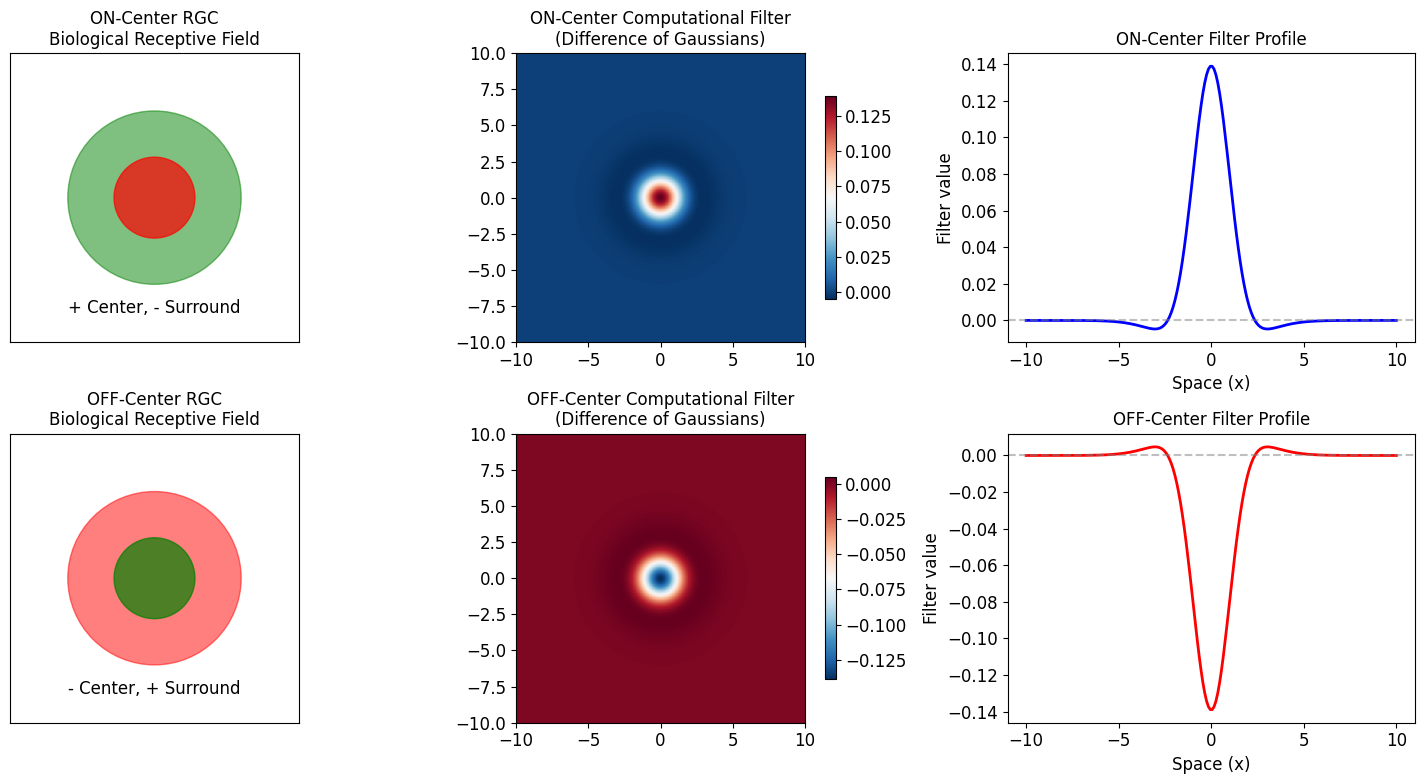

In [6]:
def compare_dog_filters():
    """Compare biological center-surround fields with DoG computational filters"""
    # Create spatial coordinates
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    
    # Create DoG filter (computational model)
    def dog_filter(X, Y, sigma_center=1.0, sigma_surround=2.0):
        # Compute radial distance
        R = np.sqrt(X**2 + Y**2)
        
        # Compute DoG
        center = np.exp(-0.5 * (R/sigma_center)**2) / (2 * np.pi * sigma_center**2)
        surround = np.exp(-0.5 * (R/sigma_surround)**2) / (2 * np.pi * sigma_surround**2)
        
        # Normalize to ensure zero sum
        dog = center - 0.5 * surround
        return dog
    
    # Create filters for ON and OFF RGCs
    on_center_filter = dog_filter(X, Y, sigma_center=1.0, sigma_surround=2.0)
    off_center_filter = -on_center_filter
    
    # Create figure
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    
    # Left column: Biological RGC RF schematic
    # ON center cell
    axs[0, 0].add_patch(plt.Circle((0, 0), 1.5, fc='green', alpha=0.5, ec='green'))
    axs[0, 0].add_patch(plt.Circle((0, 0), 0.7, fc='red', alpha=0.7, ec='red'))
    axs[0, 0].set_xlim(-2.5, 2.5)
    axs[0, 0].set_ylim(-2.5, 2.5)
    axs[0, 0].set_aspect('equal')
    axs[0, 0].set_title('ON-Center RGC\nBiological Receptive Field', fontsize=12)
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    axs[0, 0].text(0, -2, "+ Center, - Surround", ha='center')
    
    # OFF center cell
    axs[1, 0].add_patch(plt.Circle((0, 0), 1.5, fc='red', alpha=0.5, ec='red'))
    axs[1, 0].add_patch(plt.Circle((0, 0), 0.7, fc='green', alpha=0.7, ec='green'))
    axs[1, 0].set_xlim(-2.5, 2.5)
    axs[1, 0].set_ylim(-2.5, 2.5)
    axs[1, 0].set_aspect('equal')
    axs[1, 0].set_title('OFF-Center RGC\nBiological Receptive Field', fontsize=12)
    axs[1, 0].set_xticks([])
    axs[1, 0].set_yticks([])
    axs[1, 0].text(0, -2, "- Center, + Surround", ha='center')
    
    # Middle column: Computational DoG filters
    on_dog = axs[0, 1].imshow(on_center_filter, cmap='RdBu_r', extent=[-10, 10, -10, 10])
    axs[0, 1].set_title('ON-Center Computational Filter\n(Difference of Gaussians)', fontsize=12)
    plt.colorbar(on_dog, ax=axs[0, 1], shrink=0.7)
    
    off_dog = axs[1, 1].imshow(off_center_filter, cmap='RdBu_r', extent=[-10, 10, -10, 10])
    axs[1, 1].set_title('OFF-Center Computational Filter\n(Difference of Gaussians)', fontsize=12)
    plt.colorbar(off_dog, ax=axs[1, 1], shrink=0.7)
    
    # Right column: 1D profiles
    axs[0, 2].plot(x, on_center_filter[len(y)//2, :], 'b-', linewidth=2)
    axs[0, 2].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axs[0, 2].set_title('ON-Center Filter Profile', fontsize=12)
    axs[0, 2].set_xlabel('Space (x)')
    axs[0, 2].set_ylabel('Filter value')
    
    axs[1, 2].plot(x, off_center_filter[len(y)//2, :], 'r-', linewidth=2)
    axs[1, 2].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axs[1, 2].set_title('OFF-Center Filter Profile', fontsize=12)
    axs[1, 2].set_xlabel('Space (x)')
    axs[1, 2].set_ylabel('Filter value')
    
    plt.tight_layout()
    plt.show()

compare_dog_filters()

### 2. LGN Magnocellular Cells → Temporal Filtering

LGN magnocellular cells, with their sensitivity to temporal changes, perform temporal filtering of visual input. In motion energy models, this corresponds to temporal filters that capture dynamic aspects of visual stimuli:

- Transient (high temporal frequency) vs. sustained (low temporal frequency) responses
- Sensitivity to rapid changes in illumination
- Temporal differentiation of visual signals

Computationally, these are often implemented using biphasic temporal filters that differentiate the input over time.

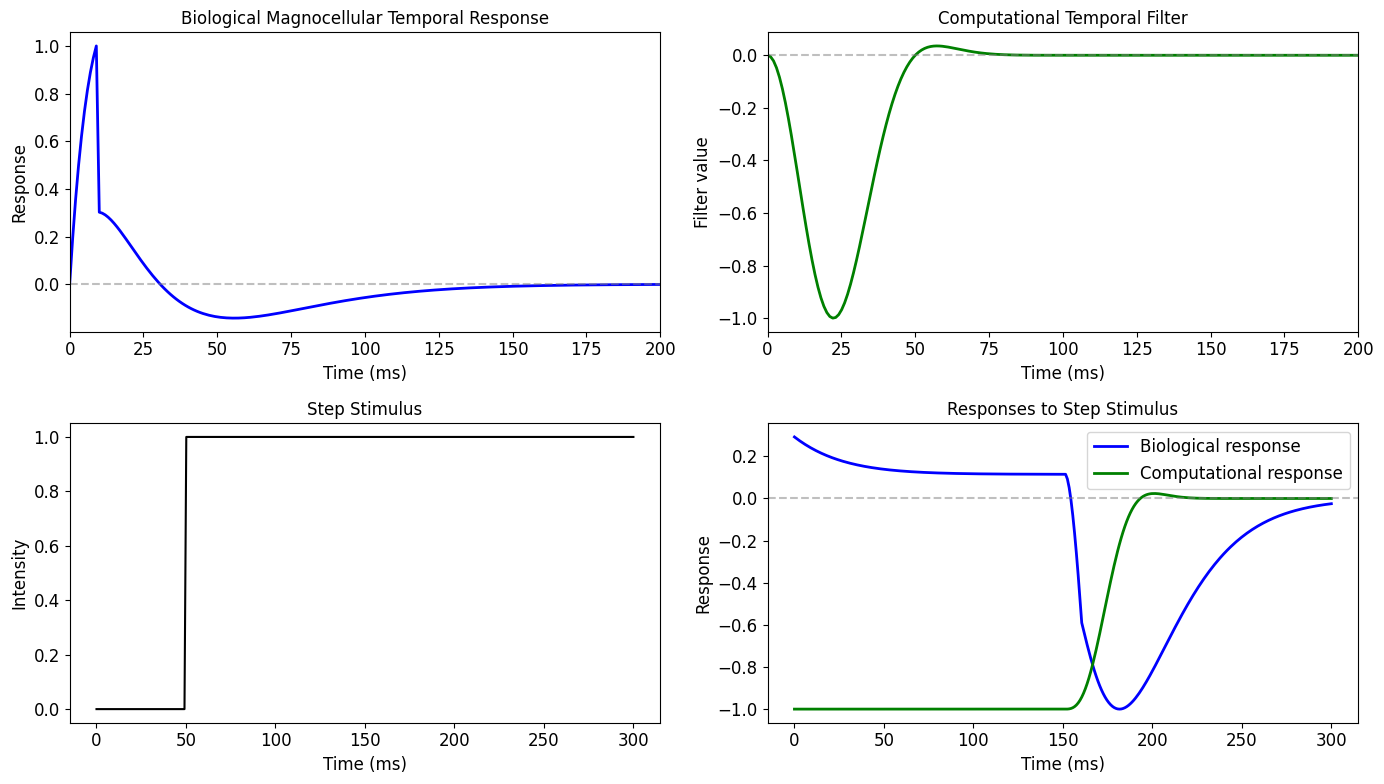

In [7]:
def compare_temporal_responses():
    """Compare magnocellular temporal responses with computational temporal filters"""
    # Create time points
    t = np.linspace(0, 300, 300)  # in milliseconds
    
    # Biological magno response function (simplified)
    def magno_response(t, tau=15, tau_inh=20, delay_inh=10, strength_inh=0.8):
        # Excitatory component
        excite = (t/tau) * np.exp(1 - t/tau) * (t > 0)
        
        # Delayed inhibitory component
        inhib = (t/tau_inh) * np.exp(1 - t/tau_inh) * (t > delay_inh)
        
        # Combine to get biphasic response
        response = excite - strength_inh * inhib
        
        return response
    
    # Computational temporal filter (typically used in motion energy models)
    def computational_temp_filter(t, omega=2*np.pi/100, tau=20):
        # Derivative of Gaussian envelope multiplied by sinusoid
        envelope = np.exp(-(t/tau)**2/2)
        derivative = -t/(tau**2) * envelope
        sinusoid = np.sin(omega*t)
        
        return derivative * sinusoid
    
    # Create the responses
    biological_response = magno_response(t)
    computational_filter = computational_temp_filter(t)
    
    # Normalize for comparison
    biological_response = biological_response / np.max(np.abs(biological_response))
    computational_filter = computational_filter / np.max(np.abs(computational_filter))
    
    # Create a stimulus with abrupt onset
    stimulus = np.zeros_like(t)
    stimulus[50:] = 1  # step input at t=50ms
    
    # Convolve with both filters to get responses
    bio_output = np.convolve(stimulus, biological_response, mode='same')
    comp_output = np.convolve(stimulus, computational_filter, mode='same')
    
    # Normalize outputs
    bio_output = bio_output / np.max(np.abs(bio_output))
    comp_output = comp_output / np.max(np.abs(comp_output))
    
    # Create figure
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    
    # Plot biological filter
    axs[0, 0].plot(t, biological_response, 'b-', linewidth=2)
    axs[0, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axs[0, 0].set_title('Biological Magnocellular Temporal Response', fontsize=12)
    axs[0, 0].set_xlabel('Time (ms)')
    axs[0, 0].set_ylabel('Response')
    axs[0, 0].set_xlim(0, 200)
    
    # Plot computational filter
    axs[0, 1].plot(t, computational_filter, 'g-', linewidth=2)
    axs[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axs[0, 1].set_title('Computational Temporal Filter', fontsize=12)
    axs[0, 1].set_xlabel('Time (ms)')
    axs[0, 1].set_ylabel('Filter value')
    axs[0, 1].set_xlim(0, 200)
    
    # Plot the stimulus
    axs[1, 0].plot(t, stimulus, 'k-', linewidth=1.5)
    axs[1, 0].set_title('Step Stimulus', fontsize=12)
    axs[1, 0].set_xlabel('Time (ms)')
    axs[1, 0].set_ylabel('Intensity')
    
    # Plot responses to stimulus
    axs[1, 1].plot(t, bio_output, 'b-', linewidth=2, label='Biological response')
    axs[1, 1].plot(t, comp_output, 'g-', linewidth=2, label='Computational response')
    axs[1, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axs[1, 1].set_title('Responses to Step Stimulus', fontsize=12)
    axs[1, 1].set_xlabel('Time (ms)')
    axs[1, 1].set_ylabel('Response')
    axs[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

compare_temporal_responses()

### 3. V1 Simple Cells → Oriented Spatiotemporal Filters

V1 simple cells with orientation selectivity map to oriented spatiotemporal filters in motion energy models. These are typically implemented as Gabor functions, which capture:

- Orientation selectivity
- Spatial frequency tuning
- Localized edge detection

In the motion energy model, these oriented filters form the basis of the spatiotemporal receptive fields that will subsequently be made directionally selective.

/var/folders/cq/mgwyqn7d59ngb2f13sxdkkxc0000gn/T/ipykernel_79892/1980785530.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


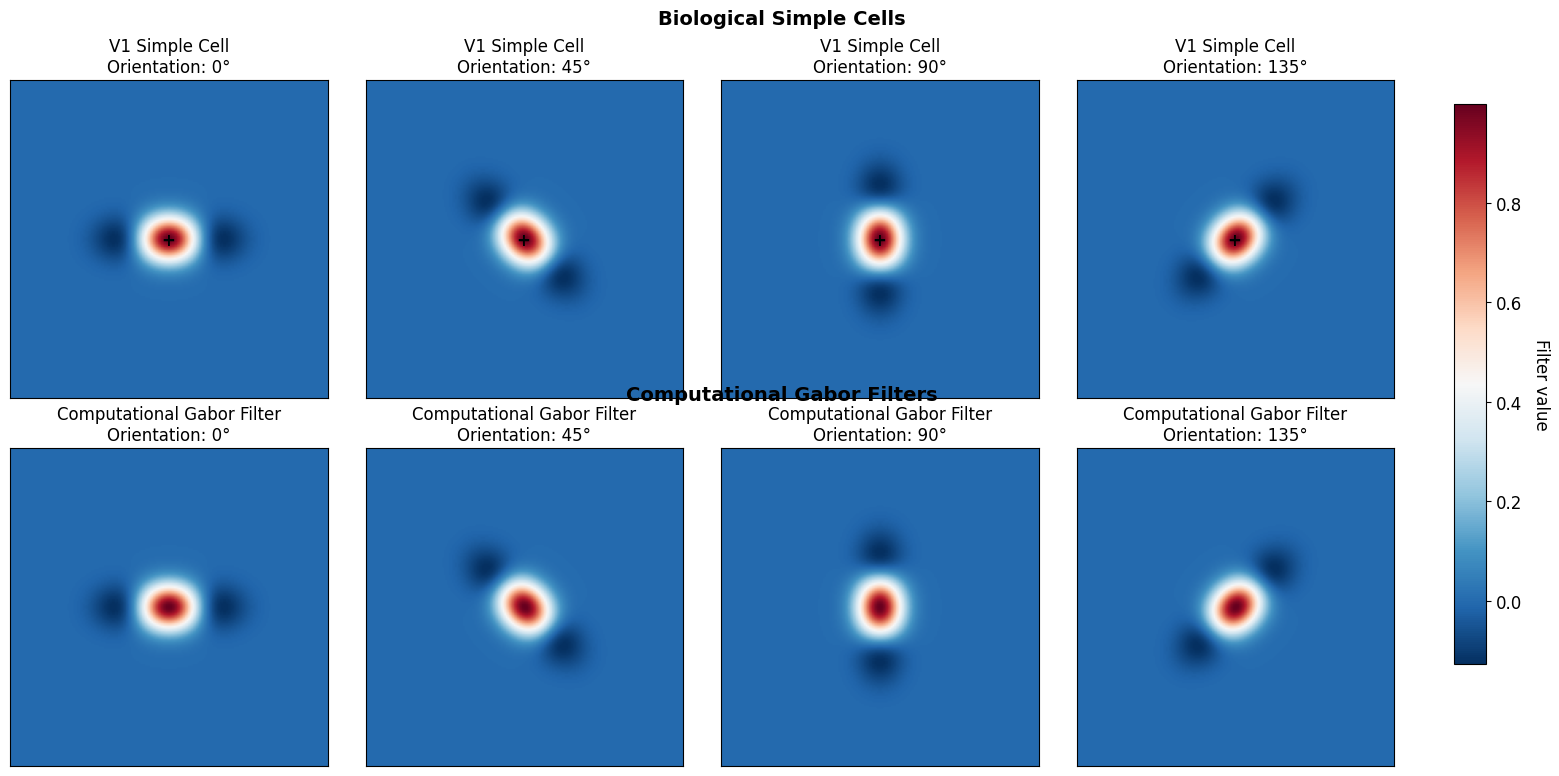

In [8]:
def compare_simple_cells():
    """Compare V1 simple cells with corresponding computational Gabor filters"""
    # Create spatial coordinates
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    
    # Function to create a Gabor filter
    def gabor_filter(X, Y, theta=0, sigma_x=2, sigma_y=1, freq=0.1, phase=0):
        # Rotate coordinates
        X_theta = X * np.cos(theta) + Y * np.sin(theta)
        Y_theta = -X * np.sin(theta) + Y * np.cos(theta)
        
        # Create Gaussian envelope
        gaussian = np.exp(-0.5 * (X_theta**2 / sigma_x**2 + Y_theta**2 / sigma_y**2))
        
        # Create sinusoidal component
        sinusoid = np.cos(2 * np.pi * freq * X_theta + phase)
        
        # Combine to get Gabor
        gabor = gaussian * sinusoid
        
        return gabor
    
    # Create Gabor filters at different orientations
    orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    gabors = [gabor_filter(X, Y, theta=theta) for theta in orientations]
    
    # Create figure
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    
    # Plot biological simple cell schematics (top row)
    for i, theta in enumerate(orientations):
        # Create a schematic representation of a simple cell
        # We'll use the Gabor but include indicators of excitatory/inhibitory regions
        gabor = gabor_filter(X, Y, theta=theta)
        
        # Display the Gabor as a biological RF
        im = axs[0, i].imshow(gabor, cmap='RdBu_r', extent=[-10, 10, -10, 10])
        
        # Add annotations for excitatory/inhibitory regions
        excitatory_mask = gabor > 0.2
        inhibitory_mask = gabor < -0.2
        
        # Find centers of excitatory/inhibitory regions
        if np.any(excitatory_mask):
            y_exc, x_exc = np.where(excitatory_mask)
            exc_center_y = np.mean(y_exc) / len(y) * 20 - 10
            exc_center_x = np.mean(x_exc) / len(x) * 20 - 10
            axs[0, i].text(exc_center_x, exc_center_y, "+", color='black', fontsize=12, 
                          ha='center', va='center', fontweight='bold')
        
        if np.any(inhibitory_mask):
            y_inh, x_inh = np.where(inhibitory_mask)
            inh_center_y = np.mean(y_inh) / len(y) * 20 - 10
            inh_center_x = np.mean(x_inh) / len(x) * 20 - 10
            axs[0, i].text(inh_center_x, inh_center_y, "−", color='black', fontsize=12, 
                          ha='center', va='center', fontweight='bold')
        
        axs[0, i].set_title(f'V1 Simple Cell\nOrientation: {int(theta*180/np.pi)}°', fontsize=12)
        axs[0, i].set_xticks([])
        axs[0, i].set_yticks([])
    
    # Add a title for the top row
    fig.text(0.5, 0.95, 'Biological Simple Cells', ha='center', fontsize=14, fontweight='bold')
    
    # Plot computational Gabor filters (bottom row)
    for i, (theta, gabor) in enumerate(zip(orientations, gabors)):
        im = axs[1, i].imshow(gabor, cmap='RdBu_r', extent=[-10, 10, -10, 10])
        axs[1, i].set_title(f'Computational Gabor Filter\nOrientation: {int(theta*180/np.pi)}°', fontsize=12)
        axs[1, i].set_xticks([])
        axs[1, i].set_yticks([])
    
    # Add a title for the bottom row
    fig.text(0.5, 0.48, 'Computational Gabor Filters', ha='center', fontsize=14, fontweight='bold')
    
    # Add a colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('Filter value', rotation=270, labelpad=20)
    
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()

compare_simple_cells()

### 4. V1 Complex Cells → Quadrature Pairs and Energy Computation

V1 complex cells, with their phase invariance, map to the quadrature pair mechanism in motion energy models. This correspondence includes:

- Pairs of filters with 90° phase difference (quadrature pairs)
- Squaring and summing operations to achieve phase invariance
- Nonlinear integration of simple cell outputs

This computational approach mirrors the biological phase invariance of complex cells, allowing the model to respond consistently regardless of the exact phase of the stimulus.

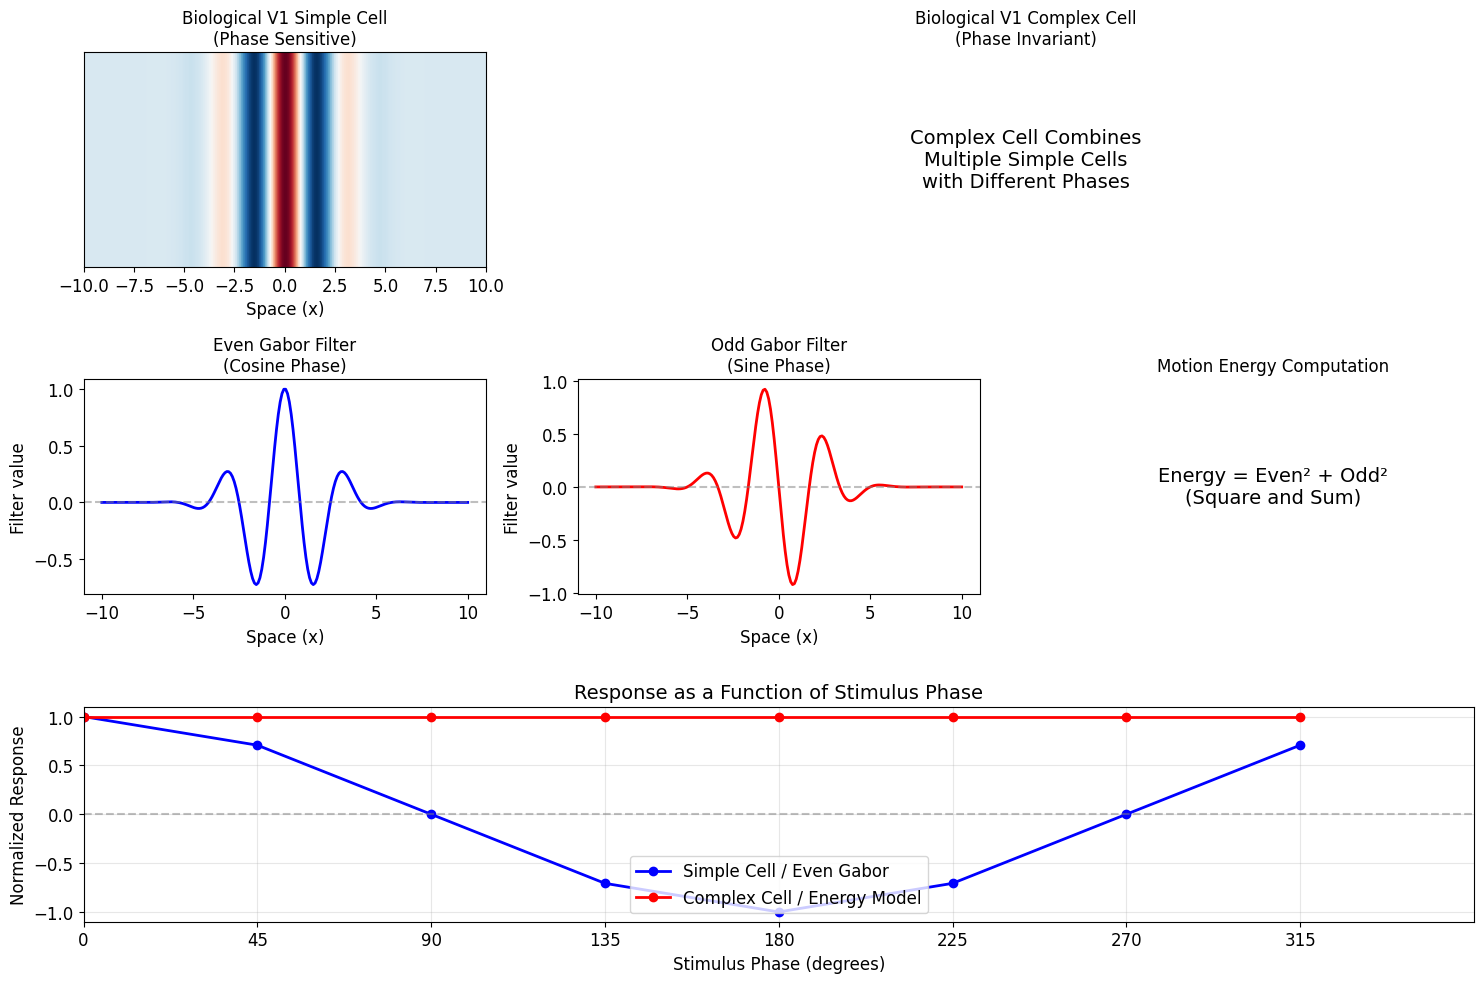

In [9]:
def illustrate_quadrature_pairs():
    """Illustrate the relationship between complex cells and quadrature pairs"""
    # Create spatial dimension
    x = np.linspace(-10, 10, 200)
    
    # Create simple gabor functions with quadrature phase relationship
    def gabor_1d(x, freq=0.3, sigma=2.0, phase=0):
        gaussian = np.exp(-0.5 * (x / sigma) ** 2)
        sinusoid = np.cos(2 * np.pi * freq * x + phase)
        return gaussian * sinusoid
    
    # Create even and odd Gabors (90° phase difference)
    even_gabor = gabor_1d(x, phase=0)          # cosine phase
    odd_gabor = gabor_1d(x, phase=np.pi/2)     # sine phase
    
    # Create a stimulus grating with varying phase
    def stimulus_grating(x, freq=0.3, phase=0):
        return np.cos(2 * np.pi * freq * x + phase)
    
    # Compute response for a range of stimulus phases
    phases = np.linspace(0, 2*np.pi, 8, endpoint=False)
    simple_responses = []
    complex_responses = []
    
    for phase in phases:
        # Create stimulus with this phase
        stimulus = stimulus_grating(x, phase=phase)
        
        # Compute responses of even and odd filters
        even_response = np.sum(stimulus * even_gabor)
        odd_response = np.sum(stimulus * odd_gabor)
        
        # Simple cell response (just the even gabor response)
        simple_responses.append(even_response)
        
        # Complex cell response (energy: sum of squares)
        energy = even_response**2 + odd_response**2
        complex_responses.append(energy)
    
    # Normalize responses for easier comparison
    simple_responses = np.array(simple_responses) / np.max(np.abs(simple_responses))
    complex_responses = np.array(complex_responses) / np.max(complex_responses)
    
    # Create figure
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(3, 3)
    
    # Top left: Biological Simple Cell
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(np.outer(np.ones(30), even_gabor), cmap='RdBu_r', aspect='auto',
              extent=[x.min(), x.max(), -3, 3])
    ax1.set_title('Biological V1 Simple Cell\n(Phase Sensitive)', fontsize=12)
    ax1.set_xlabel('Space (x)')
    ax1.set_yticks([])
    
    # Top center: Biological Complex Cell
    ax2 = fig.add_subplot(gs[0, 1:3])
    ax2.text(0.5, 0.5, 'Complex Cell Combines\nMultiple Simple Cells\nwith Different Phases', 
            ha='center', va='center', fontsize=14)
    ax2.set_title('Biological V1 Complex Cell\n(Phase Invariant)', fontsize=12)
    ax2.axis('off')
    
    # Middle row: Computational Quadrature Pair
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.plot(x, even_gabor, 'b-', linewidth=2)
    ax3.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax3.set_title('Even Gabor Filter\n(Cosine Phase)', fontsize=12)
    ax3.set_xlabel('Space (x)')
    ax3.set_ylabel('Filter value')
    
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.plot(x, odd_gabor, 'r-', linewidth=2)
    ax4.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax4.set_title('Odd Gabor Filter\n(Sine Phase)', fontsize=12)
    ax4.set_xlabel('Space (x)')
    ax4.set_ylabel('Filter value')
    
    ax5 = fig.add_subplot(gs[1, 2])
    ax5.text(0.5, 0.5, 'Energy = Even² + Odd²\n(Square and Sum)', 
            ha='center', va='center', fontsize=14)
    ax5.set_title('Motion Energy Computation', fontsize=12)
    ax5.axis('off')
    
    # Bottom row: Response vs Phase
    ax6 = fig.add_subplot(gs[2, :])
    ax6.plot(phases * 180/np.pi, simple_responses, 'b-o', linewidth=2, label='Simple Cell / Even Gabor')
    ax6.plot(phases * 180/np.pi, complex_responses, 'r-o', linewidth=2, label='Complex Cell / Energy Model')
    ax6.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax6.set_title('Response as a Function of Stimulus Phase', fontsize=14)
    ax6.set_xlabel('Stimulus Phase (degrees)')
    ax6.set_ylabel('Normalized Response')
    ax6.set_xticks(np.arange(0, 360, 45))
    ax6.set_xlim(0, 360)
    ax6.legend(loc='lower center')
    ax6.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

illustrate_quadrature_pairs()

### 5. Direction-Selective V1 Cells → Motion Energy Computation

Direction-selective V1 cells with space-time inseparable receptive fields map to the directional motion energy computation in models. This includes:

- Spatiotemporal filters with space-time inseparability
- Directional tuning through specific filter orientations in space-time
- Responses that vary with stimulus motion direction

In computational models, directional selectivity is achieved by creating spatiotemporal filters oriented in space-time, effectively implementing velocity tuning.

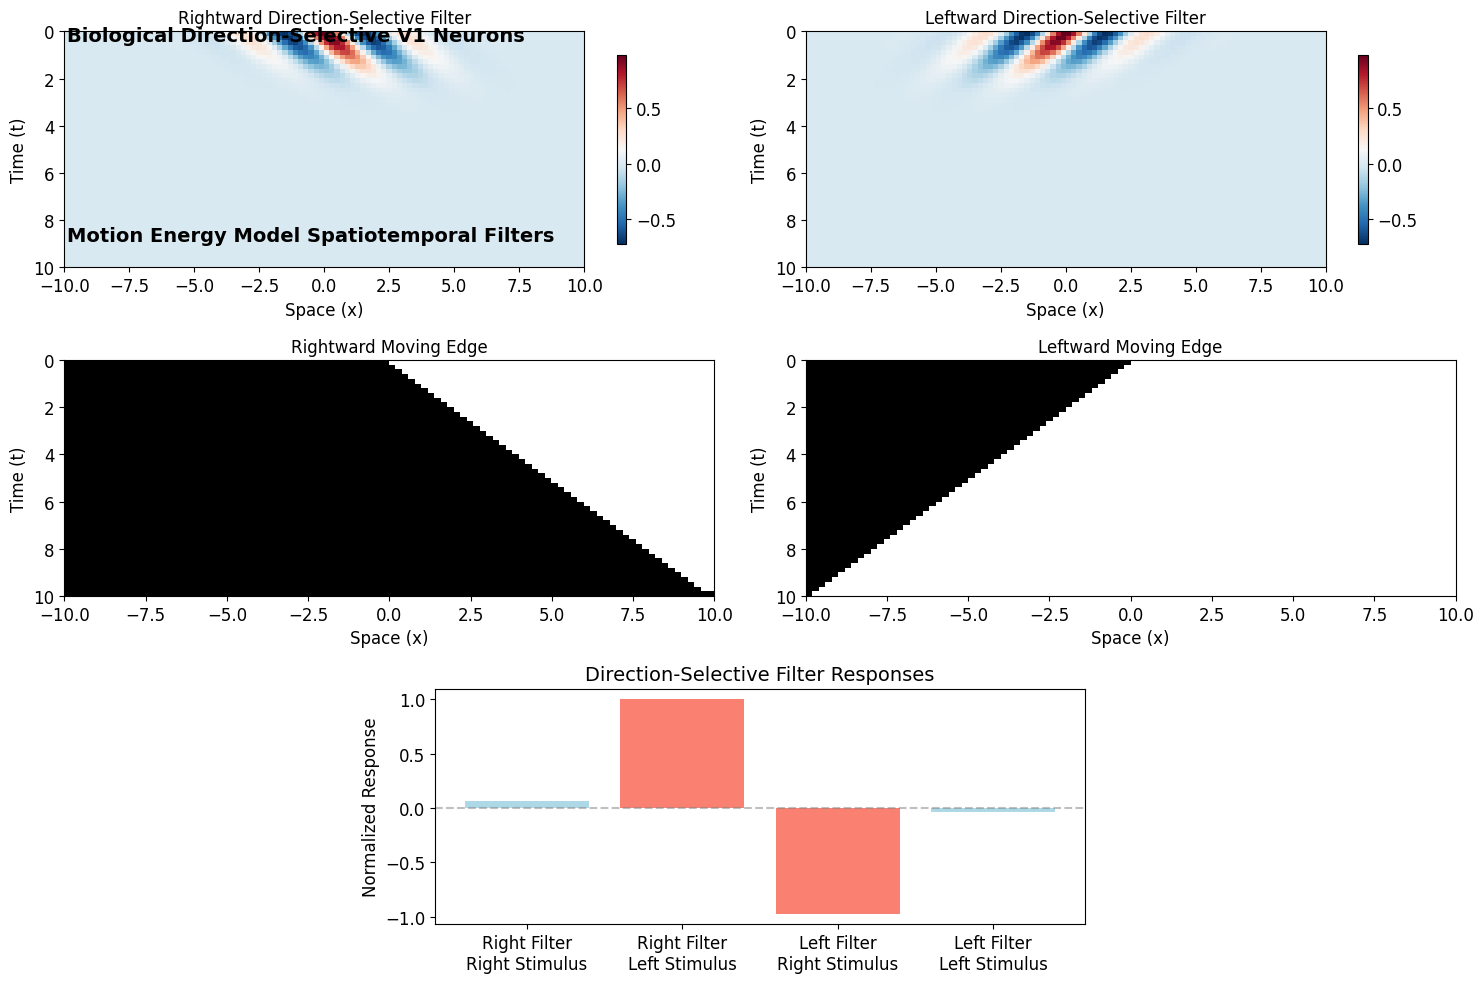

In [10]:
def illustrate_direction_selectivity():
    """Illustrate the relationship between direction-selective cells and motion energy computation"""
    # Create space and time dimensions
    x = np.linspace(-10, 10, 100)
    t = np.linspace(0, 10, 50)
    X, T = np.meshgrid(x, t)
    
    # Create space-time inseparable filters (right and left direction tuned)
    def stfilter(X, T, velocity, sigma_x=2.0, sigma_t=1.0, spatial_freq=0.3):
        # Create tilted coordinates for space-time inseparability
        X_tilted = X - velocity * T
        
        # Spatial gabor
        spatial = np.exp(-X_tilted**2 / (2*sigma_x**2)) * np.cos(2*np.pi*spatial_freq*X_tilted)
        
        # Temporal envelope
        temporal = np.exp(-T**2 / (2*sigma_t**2))
        
        return spatial * temporal
    
    # Create the filters
    rightward_filter = stfilter(X, T, velocity=1.0)  # Prefers rightward motion
    leftward_filter = stfilter(X, T, velocity=-1.0)  # Prefers leftward motion
    
    # Create moving edge stimuli
    def moving_edge(X, T, velocity):
        return (X > velocity * T).astype(float)
    
    rightward_edge = moving_edge(X, T, velocity=1.0)
    leftward_edge = moving_edge(X, T, velocity=-1.0)
    
    # Compute filter responses
    right_filter_right_stim = np.sum(rightward_filter * rightward_edge)
    right_filter_left_stim = np.sum(rightward_filter * leftward_edge)
    left_filter_right_stim = np.sum(leftward_filter * rightward_edge)
    left_filter_left_stim = np.sum(leftward_filter * leftward_edge)
    
    # Create figure
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(3, 4)
    
    # Top row: Space-time filters
    ax1 = fig.add_subplot(gs[0, 0:2])
    im1 = ax1.imshow(rightward_filter, cmap='RdBu_r', aspect='auto',
                    extent=[x.min(), x.max(), t.max(), t.min()])
    ax1.set_title('Rightward Direction-Selective Filter', fontsize=12)
    ax1.set_xlabel('Space (x)')
    ax1.set_ylabel('Time (t)')
    plt.colorbar(im1, ax=ax1, shrink=0.8)
    
    ax2 = fig.add_subplot(gs[0, 2:4])
    im2 = ax2.imshow(leftward_filter, cmap='RdBu_r', aspect='auto',
                    extent=[x.min(), x.max(), t.max(), t.min()])
    ax2.set_title('Leftward Direction-Selective Filter', fontsize=12)
    ax2.set_xlabel('Space (x)')
    ax2.set_ylabel('Time (t)')
    plt.colorbar(im2, ax=ax2, shrink=0.8)
    
    # Middle row: Stimulus space-time plots
    ax3 = fig.add_subplot(gs[1, 0:2])
    ax3.imshow(rightward_edge, cmap='gray', aspect='auto',
              extent=[x.min(), x.max(), t.max(), t.min()])
    ax3.set_title('Rightward Moving Edge', fontsize=12)
    ax3.set_xlabel('Space (x)')
    ax3.set_ylabel('Time (t)')
    
    ax4 = fig.add_subplot(gs[1, 2:4])
    ax4.imshow(leftward_edge, cmap='gray', aspect='auto',
              extent=[x.min(), x.max(), t.max(), t.min()])
    ax4.set_title('Leftward Moving Edge', fontsize=12)
    ax4.set_xlabel('Space (x)')
    ax4.set_ylabel('Time (t)')
    
    # Bottom row: Response bar chart
    ax5 = fig.add_subplot(gs[2, 1:3])
    
    # Normalize responses for better visualization
    max_response = max(abs(right_filter_right_stim), abs(right_filter_left_stim),
                       abs(left_filter_right_stim), abs(left_filter_left_stim))
    responses = [right_filter_right_stim/max_response, right_filter_left_stim/max_response,
                left_filter_right_stim/max_response, left_filter_left_stim/max_response]
    
    labels = ['Right Filter\nRight Stimulus', 'Right Filter\nLeft Stimulus',
             'Left Filter\nRight Stimulus', 'Left Filter\nLeft Stimulus']
    colors = ['lightblue', 'salmon', 'salmon', 'lightblue']
    
    bars = ax5.bar(range(len(responses)), responses, color=colors)
    ax5.set_xticks(range(len(responses)))
    ax5.set_xticklabels(labels)
    ax5.set_ylabel('Normalized Response')
    ax5.set_title('Direction-Selective Filter Responses', fontsize=14)
    ax5.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    
    # Add biological vs. computational labels
    fig.text(0.05, 0.95, 'Biological Direction-Selective V1 Neurons', fontsize=14, fontweight='bold')
    fig.text(0.05, 0.75, 'Motion Energy Model Spatiotemporal Filters', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

illustrate_direction_selectivity()

### 6. MT Pattern Cells → Filter Banks & Integration

MT pattern cells, which integrate V1 outputs to solve problems like the aperture problem, map to the higher-level integration stage in motion energy models. This corresponds to:

- Integration across multiple V1-like filters
- Creation of filter banks tuned to different directions/speeds
- Resolution of ambiguities through integration
- Global motion computations from local measurements

In computational models, this integration stage allows for more robust motion detection and velocity estimation.

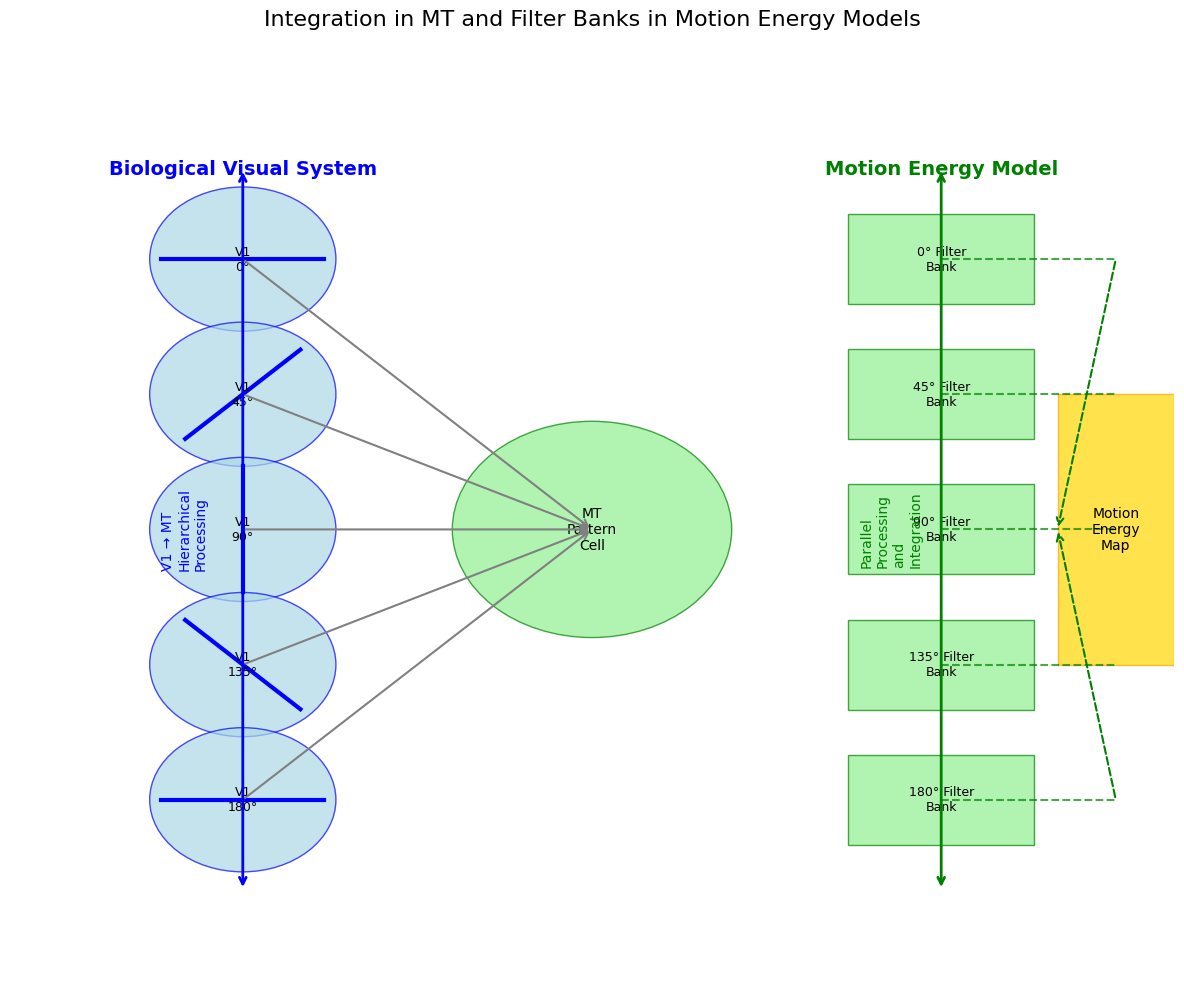

In [11]:
def illustrate_mt_integration():
    """Illustrate the integration of V1 outputs by MT and filter banks in models"""
    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Create V1 filters with different orientations
    v1_positions = [(2, y) for y in [8, 6.5, 5, 3.5, 2]]
    v1_orientations = [0, 45, 90, 135, 180]
    
    for (x, y), orientation in zip(v1_positions, v1_orientations):
        # Create an oriented bar to represent the V1 filter
        angle_rad = np.deg2rad(orientation)
        dx = 0.7 * np.cos(angle_rad)
        dy = 0.7 * np.sin(angle_rad)
        
        # Draw the oriented filter
        ax.plot([x-dx, x+dx], [y-dy, y+dy], 'b-', linewidth=3)
        
        # Draw the filter circle
        circle = plt.Circle((x, y), 0.8, fc='lightblue', ec='blue', alpha=0.7)
        ax.add_patch(circle)
        
        # Add label
        ax.text(x, y, f"V1\n{orientation}°", ha='center', va='center', fontsize=9)
    
    # Create MT integration cell
    mt_pos = (5, 5)
    mt_circle = plt.Circle(mt_pos, 1.2, fc='lightgreen', ec='green', alpha=0.7)
    ax.add_patch(mt_circle)
    ax.text(mt_pos[0], mt_pos[1], "MT\nPattern\nCell", ha='center', va='center', fontsize=10)
    
    # Create arrows from V1 to MT
    for v1_pos in v1_positions:
        ax.annotate("", xy=mt_pos, xytext=v1_pos,
                   arrowprops=dict(arrowstyle="->", lw=1.5, color='gray'))
    
    # Create motion energy model components on the right
    model_positions = [(8, y) for y in [8, 6.5, 5, 3.5, 2]]
    model_labels = [
        "0° Filter\nBank",
        "45° Filter\nBank",
        "90° Filter\nBank",
        "135° Filter\nBank",
        "180° Filter\nBank"
    ]
    
    for (x, y), label in zip(model_positions, model_labels):
        # Draw the model component
        rect = plt.Rectangle((x-0.8, y-0.5), 1.6, 1, fc='lightgreen', ec='green', alpha=0.7)
        ax.add_patch(rect)
        ax.text(x, y, label, ha='center', va='center', fontsize=9)
    
    # Create integration component
    integrator_pos = (8, 5)
    
    # Add arrows from filter banks to integration point
    for model_pos in model_positions:
        # Create dashed lines to show logical flow
        ax.plot([model_pos[0], 9.5], [model_pos[1], model_pos[1]], 'g--', alpha=0.7)
    
    # Draw the final velocity output
    ax.add_patch(plt.Rectangle((9, 3.5), 1, 3, fc='gold', ec='orange', alpha=0.7))
    ax.text(9.5, 5, "Motion\nEnergy\nMap", ha='center', va='center', fontsize=10)
    
    # Add parallel processing arrows
    ax.annotate("", xy=(9, 5), xytext=(9.5, 8),
               arrowprops=dict(arrowstyle="->", lw=1.5, color='green', linestyle='--'))
    ax.annotate("", xy=(9, 5), xytext=(9.5, 2),
               arrowprops=dict(arrowstyle="->", lw=1.5, color='green', linestyle='--'))
    
    # Add titles
    ax.text(2, 9, "Biological Visual System", ha='center', va='center', 
           fontsize=14, fontweight='bold', color='blue')
    ax.text(8, 9, "Motion Energy Model", ha='center', va='center', 
           fontsize=14, fontweight='bold', color='green')
    
    # Add arrows to show flow from V1 to MT
    ax.annotate("", xy=(2, 1), xytext=(2, 9),
               arrowprops=dict(arrowstyle="<->", lw=2, color='blue'))
    ax.text(1.3, 5, "V1 → MT\nHierarchical\nProcessing", rotation=90, va='center', 
           fontsize=10, color='blue')
    
    # Add arrows for model processing
    ax.annotate("", xy=(8, 1), xytext=(8, 9),
               arrowprops=dict(arrowstyle="<->", lw=2, color='green'))
    ax.text(7.3, 5, "Parallel\nProcessing\nand\nIntegration", rotation=90, va='center', 
           fontsize=10, color='green')
    
    plt.title("Integration in MT and Filter Banks in Motion Energy Models", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

illustrate_mt_integration()

## How Motion Energy Relates to Neural Computations

The motion energy model provides a computational framework that closely aligns with neural processes in the visual system. This relationship is evident in several key aspects:

### 1. Physiological Validation

The motion energy model has been extensively validated against physiological data:

- **Response predictions**: The model accurately predicts how direction-selective neurons respond to various motion stimuli
- **Tuning curves**: Directional and speed tuning curves of model filters match those of actual neurons
- **Illusions**: The model experiences the same motion illusions that affect human perception

### 2. Neural Plausibility

The operations in the motion energy model are neurally plausible:

- **Linear filtering**: Corresponds to the weighted summation performed by dendritic trees
- **Squaring nonlinearity**: Aligns with nonlinear operations in neural processing (e.g., spike threshold, synaptic transmission)
- **Spatial summation**: Matches the integration of inputs from multiple neurons

### 3. Hierarchical Processing

Both the visual system and the motion energy model use hierarchical processing:

- **Low-level features**: Initial stages extract basic features like edges and temporal changes
- **Mid-level integration**: Intermediate stages combine these features to detect motion direction
- **High-level representation**: Later stages integrate multiple signals to represent global motion

## Biological Constraints on Motion Energy Models

When implementing motion energy models, we should consider several biological constraints that shape how these models reflect actual neural processing:

### 1. Receptive Field Properties

- **Size and scale**: V1 receptive fields vary in size and scale, with larger RFs in the periphery
- **Frequency tuning**: Neurons exhibit specific spatial and temporal frequency tuning
- **Bandwidth**: Orientation and direction tuning have specific bandwidths (typically 30-60°)

### 2. Temporal Dynamics

- **Adaptation**: Neurons adapt to continuous stimulation
- **Latency**: Neural responses have specific temporal delays
- **Transient vs. sustained**: Different neurons show preference for transient or sustained stimuli

### 3. Nonlinearities

- **Saturation**: Neural responses saturate at high contrast
- **Thresholding**: Neurons have activation thresholds
- **Normalization**: Responses are normalized by divisive inhibition

### 4. Integration Principles

- **Weighted combination**: Different inputs are combined with specific weights
- **Competition**: Competing motions can inhibit each other
- **Global coherence**: Integration favors coherent motion interpretations

## Looking Ahead: The Adelson & Bergen Motion Energy Model

In the next module, we'll implement the Adelson & Bergen motion energy model, a foundational framework that incorporates many of the biological principles we've discussed. The model includes:

1. **Spatiotemporal filtering**: Using space-time oriented Gabor filters
2. **Quadrature pairs**: Combining filters with 90° phase differences
3. **Energy computation**: Squaring and summing filter responses
4. **Direction opponency**: Comparing motion energy in opposite directions
5. **Filter banks**: Using multiple filters tuned to different directions and speeds

This model provides a computational implementation that bridges the gap between neural mechanisms and algorithmic descriptions of motion processing.

## Summary

In this notebook, we've explored the critical connections between biological visual systems and computational motion energy models:

1. We mapped key components of the visual pathway to their computational counterparts:
   - Retinal ganglion cells → Spatial filtering
   - LGN magnocellular cells → Temporal filtering
   - V1 simple cells → Oriented spatiotemporal filters
   - V1 complex cells → Quadrature pairs and energy computation
   - Direction-selective V1 cells → Motion energy computation
   - MT pattern cells → Filter banks and integration

2. We examined how motion energy relates to neural computations, highlighting:
   - Physiological validation
   - Neural plausibility
   - Hierarchical processing

3. We discussed important biological constraints that should inform model implementation:
   - Receptive field properties
   - Temporal dynamics
   - Nonlinearities
   - Integration principles

These connections provide a foundation for the next module, where we'll implement a complete motion energy model that captures key aspects of biological visual processing. By understanding the relationship between neural mechanisms and computational models, we can build more effective and biologically plausible systems for motion perception.